# Assignment 04

[K-means clustering]

1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
2. Visualize K centroid images for each category.
3. Plot the training energy per optimization iteration.
4. Plot the training accuracy per optimization iteration.
5. Plot the testing accuracy per optimization iteration.

[energy]

$\sum_{k = 1}^K \| x_i - c_{k_i} \|^2$ 
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

[accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.

- (training energy) is computed on the training dataset.
- (training accuracy) is computed on the training dataset.
- (testing accuracy) is computed on the testing dataset.

##### 1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA 
from pandas import Series, DataFrame

#
# 라이브러리 선언
#

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

def avg(x): #1Tx/n for n-vector x
    return np.sum(x,axis=1)/list(x.shape)[1]



##### 2. Visualize K centroid images for each category.

5 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
count 1
최종 반복 횟수 105 




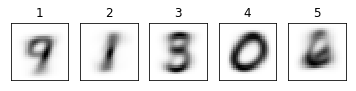

10 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
반복 횟수 160 번
반복 횟수 170 번
반복 횟수 180 번
반복 횟수 190 번
반복 횟수 200 번
반복 횟수 210 번
반복 횟수 220 번
count 2
최종 반복 횟수 225 




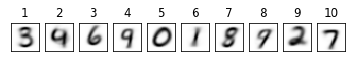

15 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
count 3
최종 반복 횟수 156 




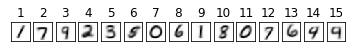

20 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
반복 횟수 160 번
반복 횟수 170 번
반복 횟수 180 번
반복 횟수 190 번
반복 횟수 200 번
반복 횟수 210 번
반복 횟수 220 번
반복 횟수 230 번
반복 횟수 240 번
반복 횟수 250 번
count 4
최종 반복 횟수 250 




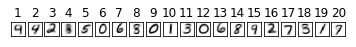

In [2]:


distance_array_index=np.zeros((1, num_image)) 


k_list=[5,10,15,20]

count=0 # k_list의 인덱스를 나타내기위한 변수
energy=np.zeros((1,1))

#num_array=np.zeros((1,4))

num_array=[]
accuracy=[]
sum_of_num=0


#
# 카테고리에 관계없는 변수들 선언
#



for i in k_list:

#
# 카테고리 수 만큼 반복하는 반복 선언
#

    
    print(i,"의 카테고리의 경우 : ")
    distance_array_index_final=np.zeros((1, num_image)) 
    distance_array_comparison=np.zeros((i, num_image)) 
    C_k_index=np.random.randint(low=0,high=5999,size=(1, i)) # k개 centroid를 초기에 랜덤하게 생성
    centroid = np.zeros((size_row * size_col,i))      # centroid를 위한 변수
    centroid_temp = np.zeros((size_row * size_col,i)) # centroid를 위한 변수
    centroid_pre = np.zeros((size_row * size_col,i))
    num=0 # 반복횟수를 위한 변수
    category=np.zeros((1,i))
    data_number=np.zeros((1,10))
    max_index=np.zeros((1,i))
    num_of_max=np.zeros((1,i))
    
#
# 카테고리 마다 초기화되는 변수들 선언
#


    while True:# 계속 갱신 Iteration
        
        energy_temp=np.zeros((1,1))
        
        distance_min=np.zeros((1, num_image))# 거리의 최소값을 저장하기 위한 변수
        distance_min=distance_min+1000 # 거리는 반복마다 초기화 되어야하므로
        

        centroid_pre=np.copy(centroid) #갱신되는지 확인하기 위해 centroid를 복사해서 저장
        
        
        for k in range(i): # 카테고리 수 만큼 반복시키기 위한 for문
            for j in range(num_image): # 정해진 레이블과의 모든거리를 구한다.
                if num==0:
                    distance_array_comparison[k,j]=distance(list_image[:,C_k_index[0,k]],list_image[:,j])
                else:
                    distance_array_comparison[k,j]=distance(centroid[:,k],list_image[:,j])
         

        for k in range(num_image):#centroid와의 거리를 구하는 작업
            for j in range(i): # i개의 카테고리를 조사
                if distance_min[0,k] > distance_array_comparison[j,k]:    
                    # 카테고리 별 거리를 비교하여 해당 카테고리에 이미지를 대입하기 위한 if문 
                    distance_min[0,k] = distance_array_comparison[j,k] # 가장 작은 거리를 갖는 레이블 값을 
                    distance_array_index_final[0,k]=j   
        
        for j in range(i):
            data_number=np.zeros((1,10))
            for k in range(num_image):
                if distance_array_index_final[0,k]==j:
                    data_number[0,list_label[k]]=data_number[0,list_label[k]]+1
            
#
# 0부터 9까지에 해당하는 카테고리들을 분류하는 반복문
#

            for m in range(10):
                max_num=data_number.max(0)
                if data_number[0,m] == max_num.max(0):
                    max_index[0,j] = m           # majority
                    num_of_max[0,j] = max_num.max(0) # the number of majority
                            
#
# majority를 구하는 작업
#
        
        accuracy.append(np.sum(num_of_max)/num_image)

                                            
#
# 리스트 accuracy에 iteration당 accuracy 삽입 
#
        
        for m in range(i):    
            count_for_cen = 0
            for n in range(num_image): 
                if distance_array_index_final[0,n] == m:
                    centroid[:,m] = centroid[:,m] + list_image[:,n]
                    count_for_cen = count_for_cen + 1
            centroid[:,m] = centroid[:,m]/(count_for_cen)
                            
#
# centroid를 구하는 작업 
#
        
        for k in range(num_image):
            idx = distance_array_index_final[0,k]
            energy_temp[0,0] = np.copy(energy_temp[0,0] + distance(list_image[:,k],centroid[:,int(idx)]))
                                    
#
# energy를 구하기위한 작업들
#
        
        if num == 0 and i == 5:
            energy = np.copy(energy_temp)
            temp = np.zeros(energy.shape)
            temp = np.copy(energy)
        else:
            e=np.concatenate((energy, energy_temp), axis=1).shape
            temp = np.zeros(e)
            temp = np.copy(np.concatenate((energy, energy_temp), axis=1))
                                       
#
# energy를 구하기 위한 작업들
#
         
        energy = np.zeros(temp.shape)
        energy = np.copy(temp)
                                    
#
# iteration을 세기 위한 num
#
        
        num = num + 1
        
        
        if num%10==0:
            print("반복 횟수",num,"번")
        
        if np.array_equal(centroid, centroid_pre) or num==250 : #최대 250번까지로 제한
            count = count + 1
            print("count",count)
            num_array.append(num)
            sum_of_num=sum_of_num+num
            print("최종 반복 횟수",num,"\n\n")
            break
                                      
#
# centroid와 centoid_pre가 변화가 있는지 확인
#
          
            
    for p in range(i):

        label       = p+1
        im_vector   = centroid[:,p]
        im_matrix   = im_vector.reshape((size_row, size_col))

        plt.subplot(1, i, p+1)
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()
                                
#
# 시각화 하기
#
        

##### 3. Plot the training energy per optimization iteration.

[energy]

$\sum_{k = 1}^K | x_i - c_{k_i} |^2 $where  ki  denotes the category of  xi , and  cki  denotes the centroid of category  xi 

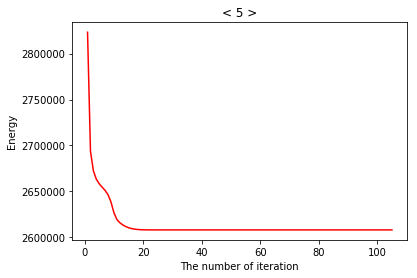

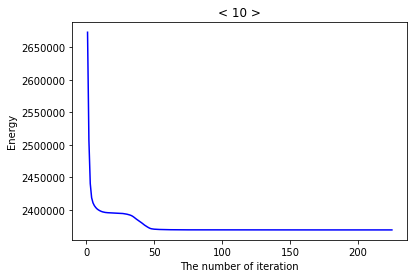

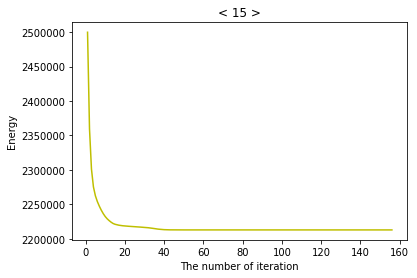

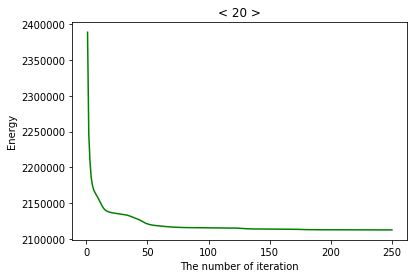

In [3]:


#
# 리스트 변수 선언
#

count_array_1=[]
count_array_2=[]
count_array_3=[]
count_array_4=[]
count=0


#
# energy 값들 분류
#


for i in range(sum_of_num):
    
    if i < num_array[0]:
        count=1
        count_array_1.append(energy[0,i])
        
    elif i< num_array[0]+num_array[1] and i >= num_array[0]:
        count=2
        count_array_2.append(energy[0,i])
        
    elif i< num_array[0]+num_array[1]+num_array[2] and i >= num_array[0]+num_array[1]:
        count=3
        count_array_3.append(energy[0,i])
        
    else:
        count=4
        count_array_4.append(energy[0,i])

#
# 시각화
#

for i in {1,2,3,4}:
    
    if i==1:
        
        count_array=[]
        
        for j in range(len(count_array_1)):
            count_array.append(count_array_1[j])
            
        ser_1=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_1.plot(color='r')
        plt.xlabel("The number of iteration")
        plt.ylabel("Energy")
        plt.title("< 5 >")
        plt.show()
        
    elif i==2:
        
        count_array=[]
        
        for j in range(len(count_array_2)):
            count_array.append(count_array_2[j])
            
        ser_2=Series( np.array(count_array), index=np.arange(1,num_array[i-1]+1,1) )
        
        ser_2.plot(color='b')
        plt.xlabel("The number of iteration")
        plt.ylabel("Energy")
        plt.title("< 10 >")
        plt.show()
        
    elif i==3:
        count_array=[]
        
        for j in range(len(count_array_3)):
            count_array.append(count_array_3[j])
            
        ser_3=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_3.plot(color='y')
        plt.xlabel("The number of iteration")
        plt.ylabel("Energy")
        plt.title("< 15 >")
        plt.show()
        
    else :
        count_array=[]
        
        for j in range(len(count_array_4)):
            count_array.append(count_array_4[j])
            
        ser_4=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_4.plot(color='g')
        plt.xlabel("The number of iteration")
        plt.ylabel("Energy")
        plt.title("< 20 >")
        plt.show()

##### 4. Plot the training accuracy per optimization iteration.
[accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$ where  N  denotes the total number of data, and  mk  denotes the number of data with majority for category  k .

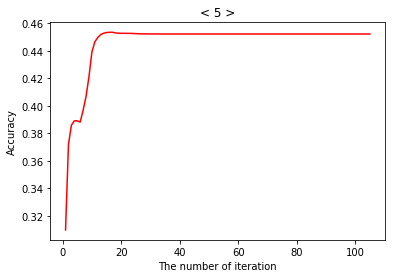

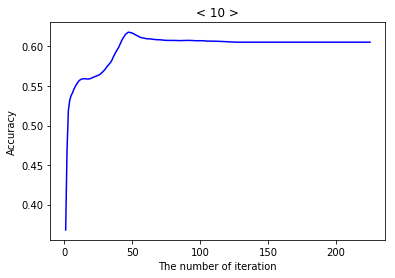

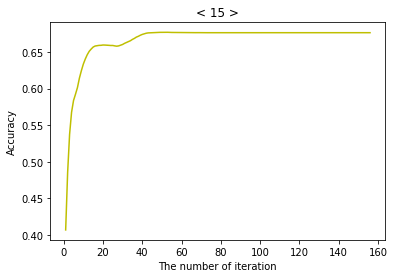

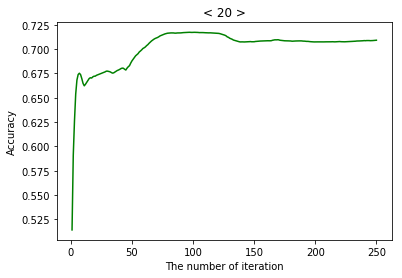

In [4]:

#
# 리스트 변수들 선언
#

count_array_1=[]
count_array_2=[]
count_array_3=[]
count_array_4=[]
count=0

#
# accuracy 값들 분류
#

for i in range(sum_of_num):
    if i < num_array[0]:
        count=1
        count_array_1.append(accuracy[i])
        
    elif i< num_array[0]+num_array[1] and i >= num_array[0]:
        count=2
        count_array_2.append(accuracy[i])
        
    elif i< num_array[0]+num_array[1]+num_array[2] and i >= num_array[0]+num_array[1]:
        count=3
        count_array_3.append(accuracy[i])
        
    else:
        count=4
        count_array_4.append(accuracy[i])


#
# 시각화
#

        
for i in {1,2,3,4}:
    if i==1:
        
        count_array=[]
        
        for j in range(len(count_array_1)):
            count_array.append(count_array_1[j])
            
        ser_1=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_1.plot(color='r')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 5 >")
        plt.show()
        
    elif i==2:
        count_array=[]
        
        for j in range(len(count_array_2)):
            count_array.append(count_array_2[j])
            
        ser_2=Series( np.array(count_array), index=np.arange(1,num_array[i-1]+1,1) )
        
        ser_2.plot(color='b')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 10 >")
        plt.show()
        
    elif i==3:
        count_array=[]
        
        for j in range(len(count_array_3)):
            count_array.append(count_array_3[j])
            
        ser_3=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_3.plot(color='y')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 15 >")
        plt.show()
        
    else :
        count_array=[]
        
        for j in range(len(count_array_4)):
            count_array.append(count_array_4[j])
            
        ser_4=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_4.plot(color='g')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 20 >")
        plt.show()
    
 

##### 5. Plot the testing accuracy per optimization iteration.
[accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$ where  N  denotes the total number of data, and  mk  denotes the number of data with majority for category  k .

#####   1) Load data of test

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA 
from pandas import Series, DataFrame
#
# test 데이터 불러오기
#

file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)



for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    min_vec=min(im_vector)
    max_vec=np.max(im_vector)
    im_vector   = np.copy((im_vector-min_vec)/(max_vec-min_vec))

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

def avg(x): #1Tx/n for n-vector x
    return np.sum(x,axis=1)/list(x.shape)[1]



#####   2) Cluster the data

In [5]:

#
# 위와 동일한 코드 값들을 분류하기위한 작업들
#
 
distance_array_index=np.zeros((1, num_image)) 


k_list=[5,10,15,20]

count=0 # k_list의 인덱스를 나타내기위한 변수
energy=np.zeros((1,1))

#num_array=np.zeros((1,4))

num_array=[]
accuracy=[]

sum_of_num=0

for i in k_list:
    
    print(i,"의 카테고리의 경우 : ")
    distance_array_index_final=np.zeros((1, num_image)) 
    distance_array_comparison=np.zeros((i, num_image)) 
    C_k_index=np.random.randint(low=0,high=5999,size=(1, i)) # k개 centroid를 초기에 랜덤하게 생성
    centroid = np.zeros((size_row * size_col,i))      # centroid를 위한 변수
    centroid_temp = np.zeros((size_row * size_col,i)) # centroid를 위한 변수
    centroid_pre = np.zeros((size_row * size_col,i))
    num=0 # 반복횟수를 위한 변수
    category=np.zeros((1,i))
    data_number=np.zeros((1,10))
    max_index=np.zeros((1,i))
    num_of_max=np.zeros((1,i))
    
    while True:# 계속 갱신 Iteration
        
        energy_temp=np.zeros((1,1))
        
        distance_min=np.zeros((1, num_image))# 거리의 최소값을 저장하기 위한 변수
        distance_min=distance_min+1000 # 거리는 반복마다 초기화 되어야하므로
        

        centroid_pre=np.copy(centroid)
        
        for k in range(i): # 카테고리 수 만큼 반복시키기 위한 for문
            for j in range(num_image): # 정해진 레이블과의 모든거리를 구한다.
                if num==0:
                    distance_array_comparison[k,j]=distance(list_image[:,C_k_index[0,k]],list_image[:,j])
                else:
                    distance_array_comparison[k,j]=distance(centroid[:,k],list_image[:,j])
         

        for k in range(num_image):#centroid와의 거리를 구하는 작업
            for j in range(i): # i개의 카테고리를 조사
                if distance_min[0,k] > distance_array_comparison[j,k]:    
                    # 카테고리 별 거리를 비교하여 해당 카테고리에 이미지를 대입하기 위한 if문 
                    distance_min[0,k] = distance_array_comparison[j,k] # 가장 작은 거리를 갖는 레이블 값을 
                    distance_array_index_final[0,k]=j   
        
        for j in range(i):
            data_number=np.zeros((1,10))
            for k in range(num_image):
                if distance_array_index_final[0,k]==j:
                    data_number[0,list_label[k]]=data_number[0,list_label[k]]+1
            for m in range(10):
                max=data_number.max(0)
                
                if data_number[0,m] == max.max(0):
                    max_index[0,j] = m           # majority
                    num_of_max[0,j] = max.max(0) # the number of majority
        
        accuracy.append(np.sum(num_of_max)/num_image)

                
        for m in range(i): #centroid를 구하는 작업    
            count_for_cen = 0
            for n in range(num_image): 
                if distance_array_index_final[0,n] == m:
                    centroid[:,m] = centroid[:,m] + list_image[:,n]
                    count_for_cen = count_for_cen + 1
            centroid[:,m] = centroid[:,m]/(count_for_cen)
        
        for k in range(num_image):
            idx = distance_array_index_final[0,k]
            energy_temp[0,0] = np.copy(energy_temp[0,0] + distance(list_image[:,k],centroid[:,int(idx)]))
        
        if num == 0 and i == 5:
            energy = np.copy(energy_temp)
            temp = np.zeros(energy.shape)
            temp = np.copy(energy)
        else:
            e=np.concatenate((energy, energy_temp), axis=1).shape
            temp = np.zeros(e)
            temp = np.copy(np.concatenate((energy, energy_temp), axis=1))
            
        energy = np.zeros(temp.shape)
        energy = np.copy(temp)
        
        
        num = num + 1
        
        if num%10==0:
            print("반복 횟수",num,"번")
        
        if np.array_equal(centroid, centroid_pre) or num==250: #최대 250번까지로 제한
            count = count + 1
            print("count",count)
            num_array.append(num)
            sum_of_num=sum_of_num+num
            print("최종 반복 횟수",num,"\n\n")
            break

5 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
count 1
최종 반복 횟수 134 


10 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
반복 횟수 160 번
count 2
최종 반복 횟수 167 


15 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
반복 횟수 160 번
반복 횟수 170 번
반복 횟수 180 번
반복 횟수 190 번
반복 횟수 200 번
count 3
최종 반복 횟수 200 


20 의 카테고리의 경우 : 
반복 횟수 10 번
반복 횟수 20 번
반복 횟수 30 번
반복 횟수 40 번
반복 횟수 50 번
반복 횟수 60 번
반복 횟수 70 번
반복 횟수 80 번
반복 횟수 90 번
반복 횟수 100 번
반복 횟수 110 번
반복 횟수 120 번
반복 횟수 130 번
반복 횟수 140 번
반복 횟수 150 번
반복 횟수 160 번
반복 횟수 170 번
반복 횟수 180 번
count 4
최종 반복 횟수 184 




#####   3) Plot the testing accuracy

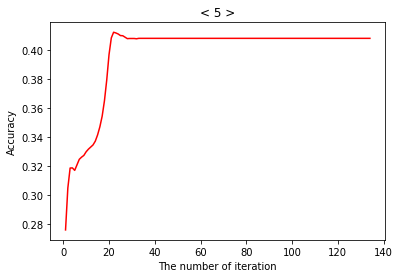

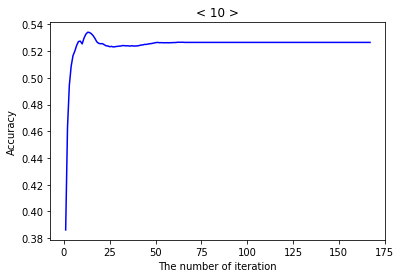

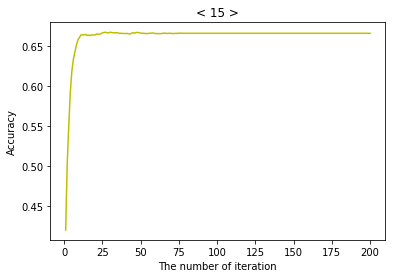

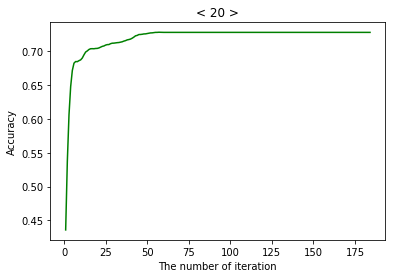

In [6]:

#
# 리스트 변수들 선언
#

count_array_1=[]
count_array_2=[]
count_array_3=[]
count_array_4=[]
count=0


#
# 반복 회수 분류 작업
#


for i in range(sum_of_num):
    if i < num_array[0]:
        count=1
        count_array_1.append(accuracy[i])
        
    elif i< num_array[0]+num_array[1] and i >= num_array[0]:
        count=2
        count_array_2.append(accuracy[i])
        
    elif i< num_array[0]+num_array[1]+num_array[2] and i >= num_array[0]+num_array[1]:
        count=3
        count_array_3.append(accuracy[i])
        
    else:
        count=4
        count_array_4.append(accuracy[i])


#
# test 데이터에 관한 accuracy 그리기
#

        
for i in {1,2,3,4}:
    if i==1:
        
        count_array=[]
        
        for j in range(len(count_array_1)):
            count_array.append(count_array_1[j])
            
        ser_1=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_1.plot(color='r')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 5 >")
        plt.show()
        
    elif i==2:
        count_array=[]
        
        for j in range(len(count_array_2)):
            count_array.append(count_array_2[j])
            
        ser_2=Series( np.array(count_array), index=np.arange(1,num_array[i-1]+1,1) )
        
        ser_2.plot(color='b')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 10 >")
        plt.show()
        
    elif i==3:
        count_array=[]
        
        for j in range(len(count_array_3)):
            count_array.append(count_array_3[j])
            
        ser_3=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_3.plot(color='y')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 15 >")
        plt.show()
        
    else :
        count_array=[]
        
        for j in range(len(count_array_4)):
            count_array.append(count_array_4[j])
            
        ser_4=Series(np.array(count_array),index=np.arange(1,num_array[i-1]+1,1))
        
        ser_4.plot(color='g')
        plt.xlabel("The number of iteration")
        plt.ylabel("Accuracy")
        plt.title("< 20 >")
        plt.show()
    
 